# In this notebook we are going to create a linear regression model using python and basic machine learning libraries.
we will start by adding some python libraries.

In this lesson we will use a salary dataset , our task is to create and train a model which can predict the salary if experience of an employee is known.
understand the dataset given to you properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In the above cell we have imported three different libraries as you can see with there alias names .
1. numpy(numerical python)- used to perform matrix calculation and basic matrix function , as we handle data in form of vector and matrices.
2. matplotlib - used to plot graph , curves or images using our data.
3. pandas - used for file handling command

In [2]:
data=pd.read_csv('Salary_Data.csv')

In this cell we have used pd(panda) library to load the data stored in csv to our variable(data) , here csv file in stored in the same directory as the notebook (you can also define path such as"home\user\file1\file.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


head() function is used to show the starting few rows of the data, you can see the whole data by simply typing variable and executing it.

In [5]:
x= data.iloc[:,:-1].values
y=data.iloc[:,1].values

    x is our input for the model i.e. experience of an employee 
    y is our output i.e. salary of an employee 
    dataset in divided into input and output 

In [9]:
data.count().isnull()

YearsExperience    False
Salary             False
dtype: bool

    As we can see there is no null value so we don't need to use the imputer function ,
        In case you need it :
        from sklearn.preprocessing import Imputer
        imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
        imputer=imputer.fit(x)
        x=imputer.transform(x)

    Also there is none categorical column . so, we don't need to use the one hot encoder to create our dummy variables.
    In case you need it :
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    labelencoder_x=LabelEncoder()
    x[:,0]=labelencoder_x.fit_transform(x[:,0])
    onehotencoder=OneHotEncoder(categorical_features=[0])
    x=onehotencoder.fit_transform(x).toarray()
    labelencoder_y=LabelEncoder()
    y=labelencoder_x.fit_transform(y)
    
    please carefully index the column needed to encode in line 3 of code

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In the above cell library sklearn.model_selection we have called train_test_split function to split our dataset into train set which is used to trein our model and test set which is used to test our trained model.

The linear regression function which we are going to use to create our regression model provide with automatic scaling . so, we don't need to scale the data before creating our model but even if we do it won't largely effect the prediction of our model .

    In case you need it :
    from sklearn.preprocessing import StandardScaler
    sc_x=StandardScaler()
    x_train=sc_x.fit_transform(x_train)
    x_test=sc_x.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In the above cell linearregression function is imported from the sklearn.linear_model library,
then this fun. is used to create our model(regressor) and then the model is trained using the train dataset.

In [14]:
y_pred= regressor.predict(x_test)

In the above cell the prediction made by our model using the test dataset is stored in the y_pred variable 

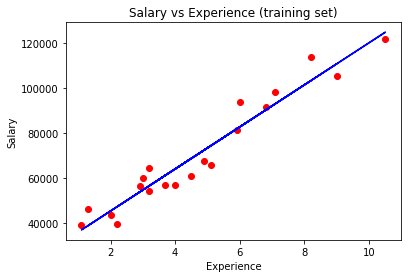

In [16]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

The above graph shows the train data as the red scattered dot and using our linear model predictions we have plotted the blue line.  

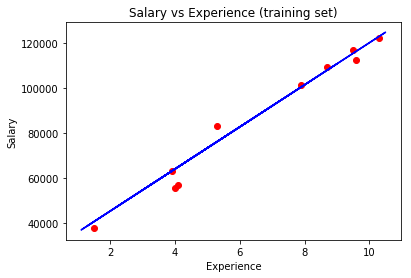

In [17]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

The above graph shows the test set as red dots and blue line is our prediction to the test dataset , we can see our model can exactly predict some salaries while rest are close to it.